In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [34]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]

df['Average'] = (df.Magicv2 + df.localization4 + df.localizationlab + df.Magicv2_5g + df.localization3 + df.localization_lab5g + df.localization1 + df.localization4_5g + df.localization2 + df.localization3_5g + df.localization1_5g)/11
df.head()

,x,y,Magicv2,localization4,localizationlab,Magicv2_5g,localization3,localization_lab5g,localization1,localization4_5g,localization2,localization3_5g,localization1_5g,Average
0,5.0,-11.75,-56,-45,-66,-66,-41,-79,-76,-73,-75,-61,-90,-66.181818
1,5.0,-11.75,-56,-45,-63,-65,-41,-78,-73,-68,-75,-63,-95,-65.636364
2,5.0,-11.75,-55,-48,-59,-67,-42,-78,-73,-67,-73,-59,-93,-64.909091
3,5.0,-11.75,-55,-48,-59,-70,-43,-78,-73,-68,-73,-56,-95,-65.272727
4,5.0,-11.75,-55,-46,-63,-70,-39,-80,-73,-70,-73,-57,-95,-65.545455


In [35]:
X = df.drop('Average', axis = 1)
y = df['Average']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [13]:
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [14]:
print(best_params)
print(gsc.score(x_train,y_train))

{'C': 1000, 'epsilon': 0.0001, 'gamma': 0.0001}
-1.390190414262935e-06


In [16]:
SupportVectorRegModel = SVR(kernel='rbf', gamma = 0.0001, C = 1000, epsilon = 0.0001)
SupportVectorRegModel.fit(x_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([-74.09211784, -74.17320045, -74.08433263, -74.17980426,
       -74.98481265, -75.52584847, -75.44869146, -75.29201269,
       -74.83160093, -74.38164494, -74.65211922, -74.65100924,
       -74.8266225 , -75.25761431, -74.4735359 , -74.83074793,
       -75.62283286, -74.9525809 , -74.77175426, -74.77175426,
       -74.06312735, -74.51917509, -74.07127293, -74.16636769,
       -76.86489456, -73.69704857, -73.42450146, -73.33658308,
       -72.9742459 , -72.9742459 , -73.77827207, -73.77827207,
       -73.68754993, -73.41885958, -73.60303672, -73.51614689,
       -74.33508274, -74.42100431, -73.96501529, -73.78347282,
       -73.78347282, -73.69358535, -73.60224187, -73.42494578,
       -73.05905745, -73.59248884, -72.43620069, -72.69588679,
       -72.51950621, -71.83144868, -72.26988746, -72.01069543,
       -72.09779444, -75.68440837, -72.44611296, -72.09044404,
       -72.79432369, -72.61898384, -72.88861806, -72.61898384,
       -72.4432901 , -72.62399529, -72.97733947, -72.53

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.028401909637969548

In [19]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
496,-74.090909,-74.092118
497,-74.181818,-74.173200
498,-74.090909,-74.084333
499,-74.181818,-74.179804
500,-75.000000,-74.984813
...,...,...
615,-70.363636,-70.403823
616,-70.181818,-70.234877
617,-70.454545,-70.484758
618,-70.363636,-70.405974


In [20]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.023497580669136767
Mean Squared Error: 0.0008066684710833875
Root Mean Squared Error: 0.028401909637969548


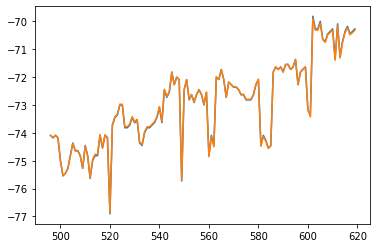

In [21]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()

In [22]:
SupportVectorRegModel = SVR(kernel='rbf', gamma = 0.0001, C = 1000, epsilon = 0.0001)
SupportVectorRegModel.fit(X, y)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = SupportVectorRegModel.predict(X)
y_pred

array([-66.18179085, -65.63605292, -64.90880231, -65.27377459,
       -65.53937151, -64.81842797, -65.27606736, -64.81790452,
       -64.7273662 , -64.45416458, -67.18236559, -67.63596855,
       -64.81762912, -63.72728841, -63.81823238, -63.45669337,
       -63.36316784, -63.18186834, -63.00303783, -63.36330047,
       -68.9997351 , -66.72690614, -66.81738042, -67.63617978,
       -66.9975599 , -66.81781848, -66.27252458, -66.35842178,
       -65.90563585, -65.81803635, -66.00079753, -66.00393211,
       -66.90942531, -65.72697195, -67.09059779, -66.81773308,
       -66.54113262, -67.18176885, -67.00062195, -67.27235713,
       -67.90850286, -67.99956302, -67.45391358, -67.54477781,
       -67.54578714, -67.54503545, -67.09106291, -66.99953   ,
       -66.99959469, -67.36287702, -70.45402653, -69.2740253 ,
       -68.90907171, -68.36394373, -71.18093347, -69.00072133,
       -67.72701962, -68.09105622, -67.27203859, -67.63605204,
       -67.35870796, -67.45483121, -68.0901781 , -68.36

In [25]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

0.0009446740659972786

In [27]:
df=pd.DataFrame({'Actual':y, 'Predicted':y_pred})
df

,Actual,Predicted
0,-66.181818,-66.181791
1,-65.636364,-65.636053
2,-64.909091,-64.908802
3,-65.272727,-65.273775
4,-65.545455,-65.539372
...,...,...
615,-70.363636,-70.363579
616,-70.181818,-70.182341
617,-70.454545,-70.454026
618,-70.363636,-70.363561


In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.0005921894048240445
Mean Squared Error: 8.924090909678305e-07
Root Mean Squared Error: 0.0009446740659972786


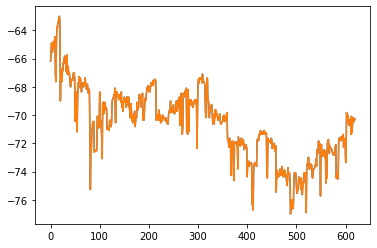

In [30]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()